# Assignment - Linear Regression
## Car Pricing - Geely Auto

#### Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

**Identify factors of car pricing in USA & Desing a Linear Regression model to predict Car prices using these factors!**

## Step 1: Reading and Understanding the Data

Let us first import Warnings, NumPy and Pandas and read the car pricing dataset

In [382]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [383]:
import numpy as np
import pandas as pd

In [384]:
car_price = pd.read_csv("D:/Upgrad-AI & ML/ML-1/Linear regression assignment/CarPrice_Assignment.csv")

In [385]:
# Check the head of the dataset
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Inspect the various aspects of the car pricing dataframe

In [386]:
car_price.shape

(205, 26)

In [387]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

#### Conclusion:
There are no null values in the dataset

In [388]:
car_price.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [389]:
# Transforming Car Name to extract Company name 
car_price.CarName = list(map(lambda x:x.split(' ')[0],car_price.CarName))
np.unique(car_price.CarName)

array(['Nissan', 'alfa-romero', 'audi', 'bmw', 'buick', 'chevrolet',
       'dodge', 'honda', 'isuzu', 'jaguar', 'maxda', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porcshce',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'volvo', 'vw'], dtype=object)

In [390]:
# Replacing wrongly spelled Car company names with correct ones
car_price['CarName'] = car_price['CarName'].replace(["vokswagen","vw"], "volkswagen")
car_price['CarName'] = car_price['CarName'].replace("maxda", "mazda")
car_price['CarName'] = car_price['CarName'].replace("porcshce", "porsche")
car_price['CarName'] = car_price['CarName'].replace("toyouta", "toyota")
car_price['CarName'] = car_price['CarName'].replace("Nissan", "nissan")
np.unique(car_price.CarName)

array(['alfa-romero', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge',
       'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [391]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

<Figure size 3600x2160 with 0 Axes>

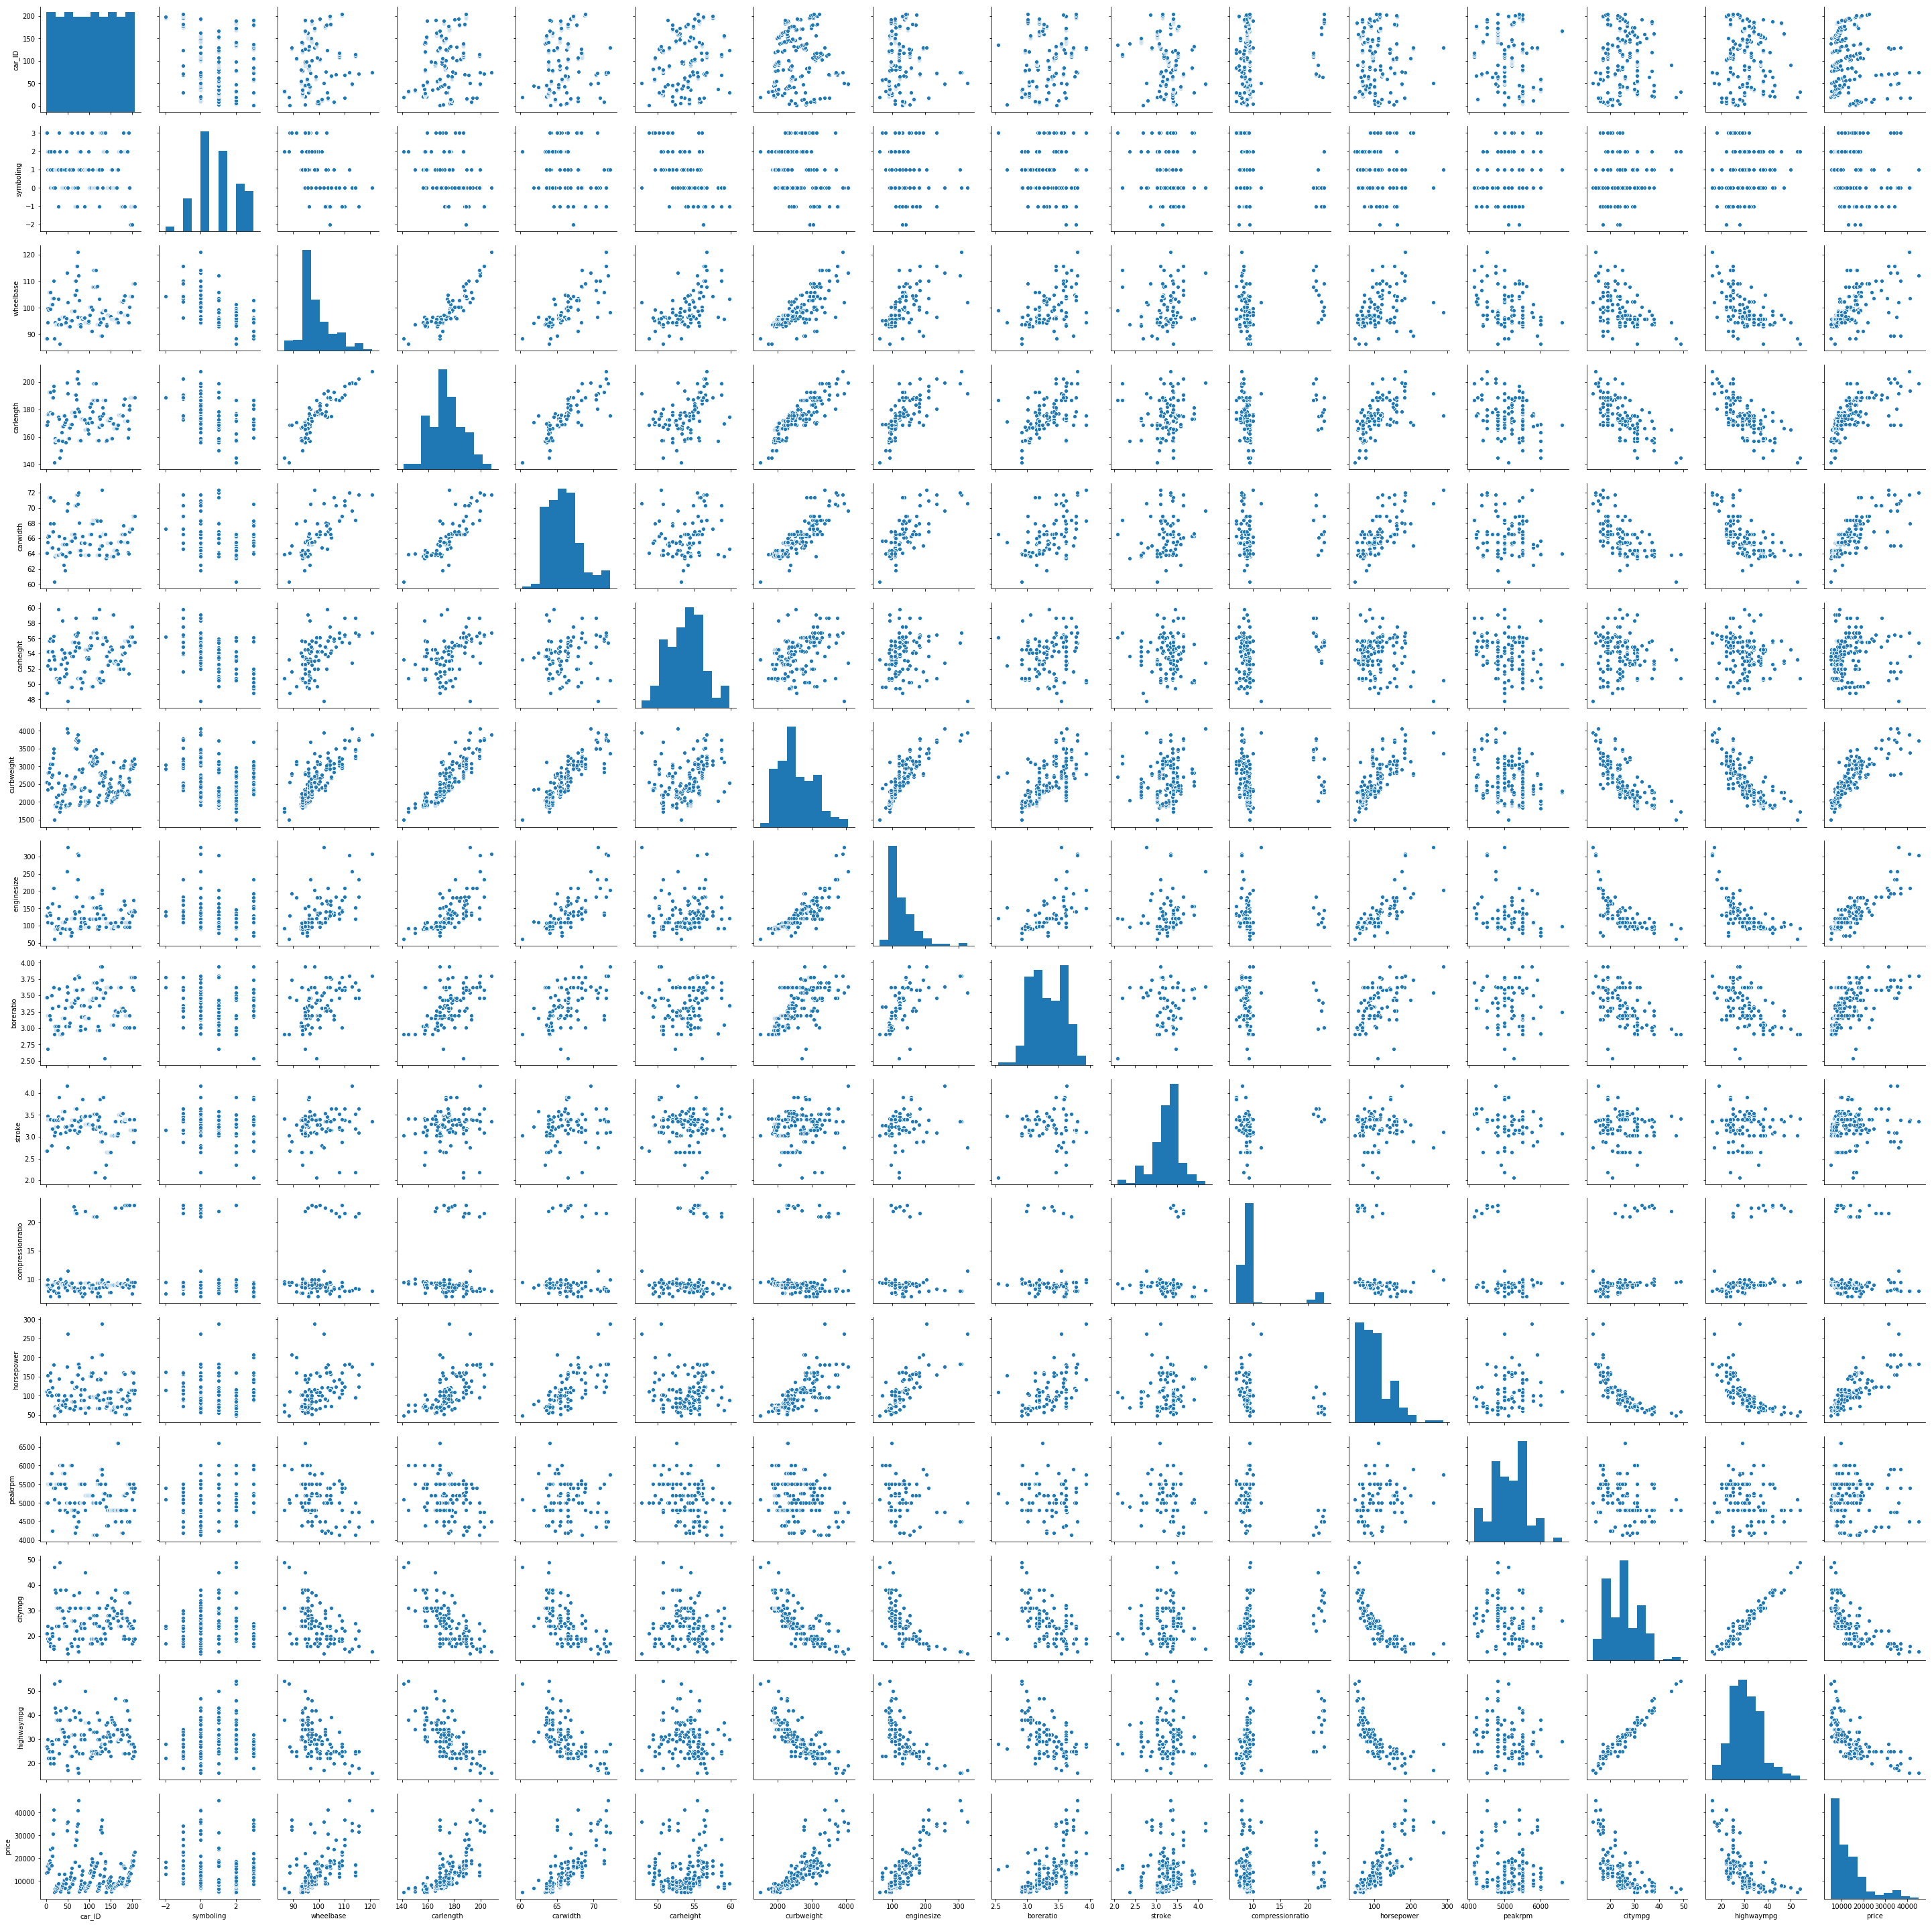

In [392]:
plt.figure(figsize=(50, 30))
sns.pairplot(car_price)
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

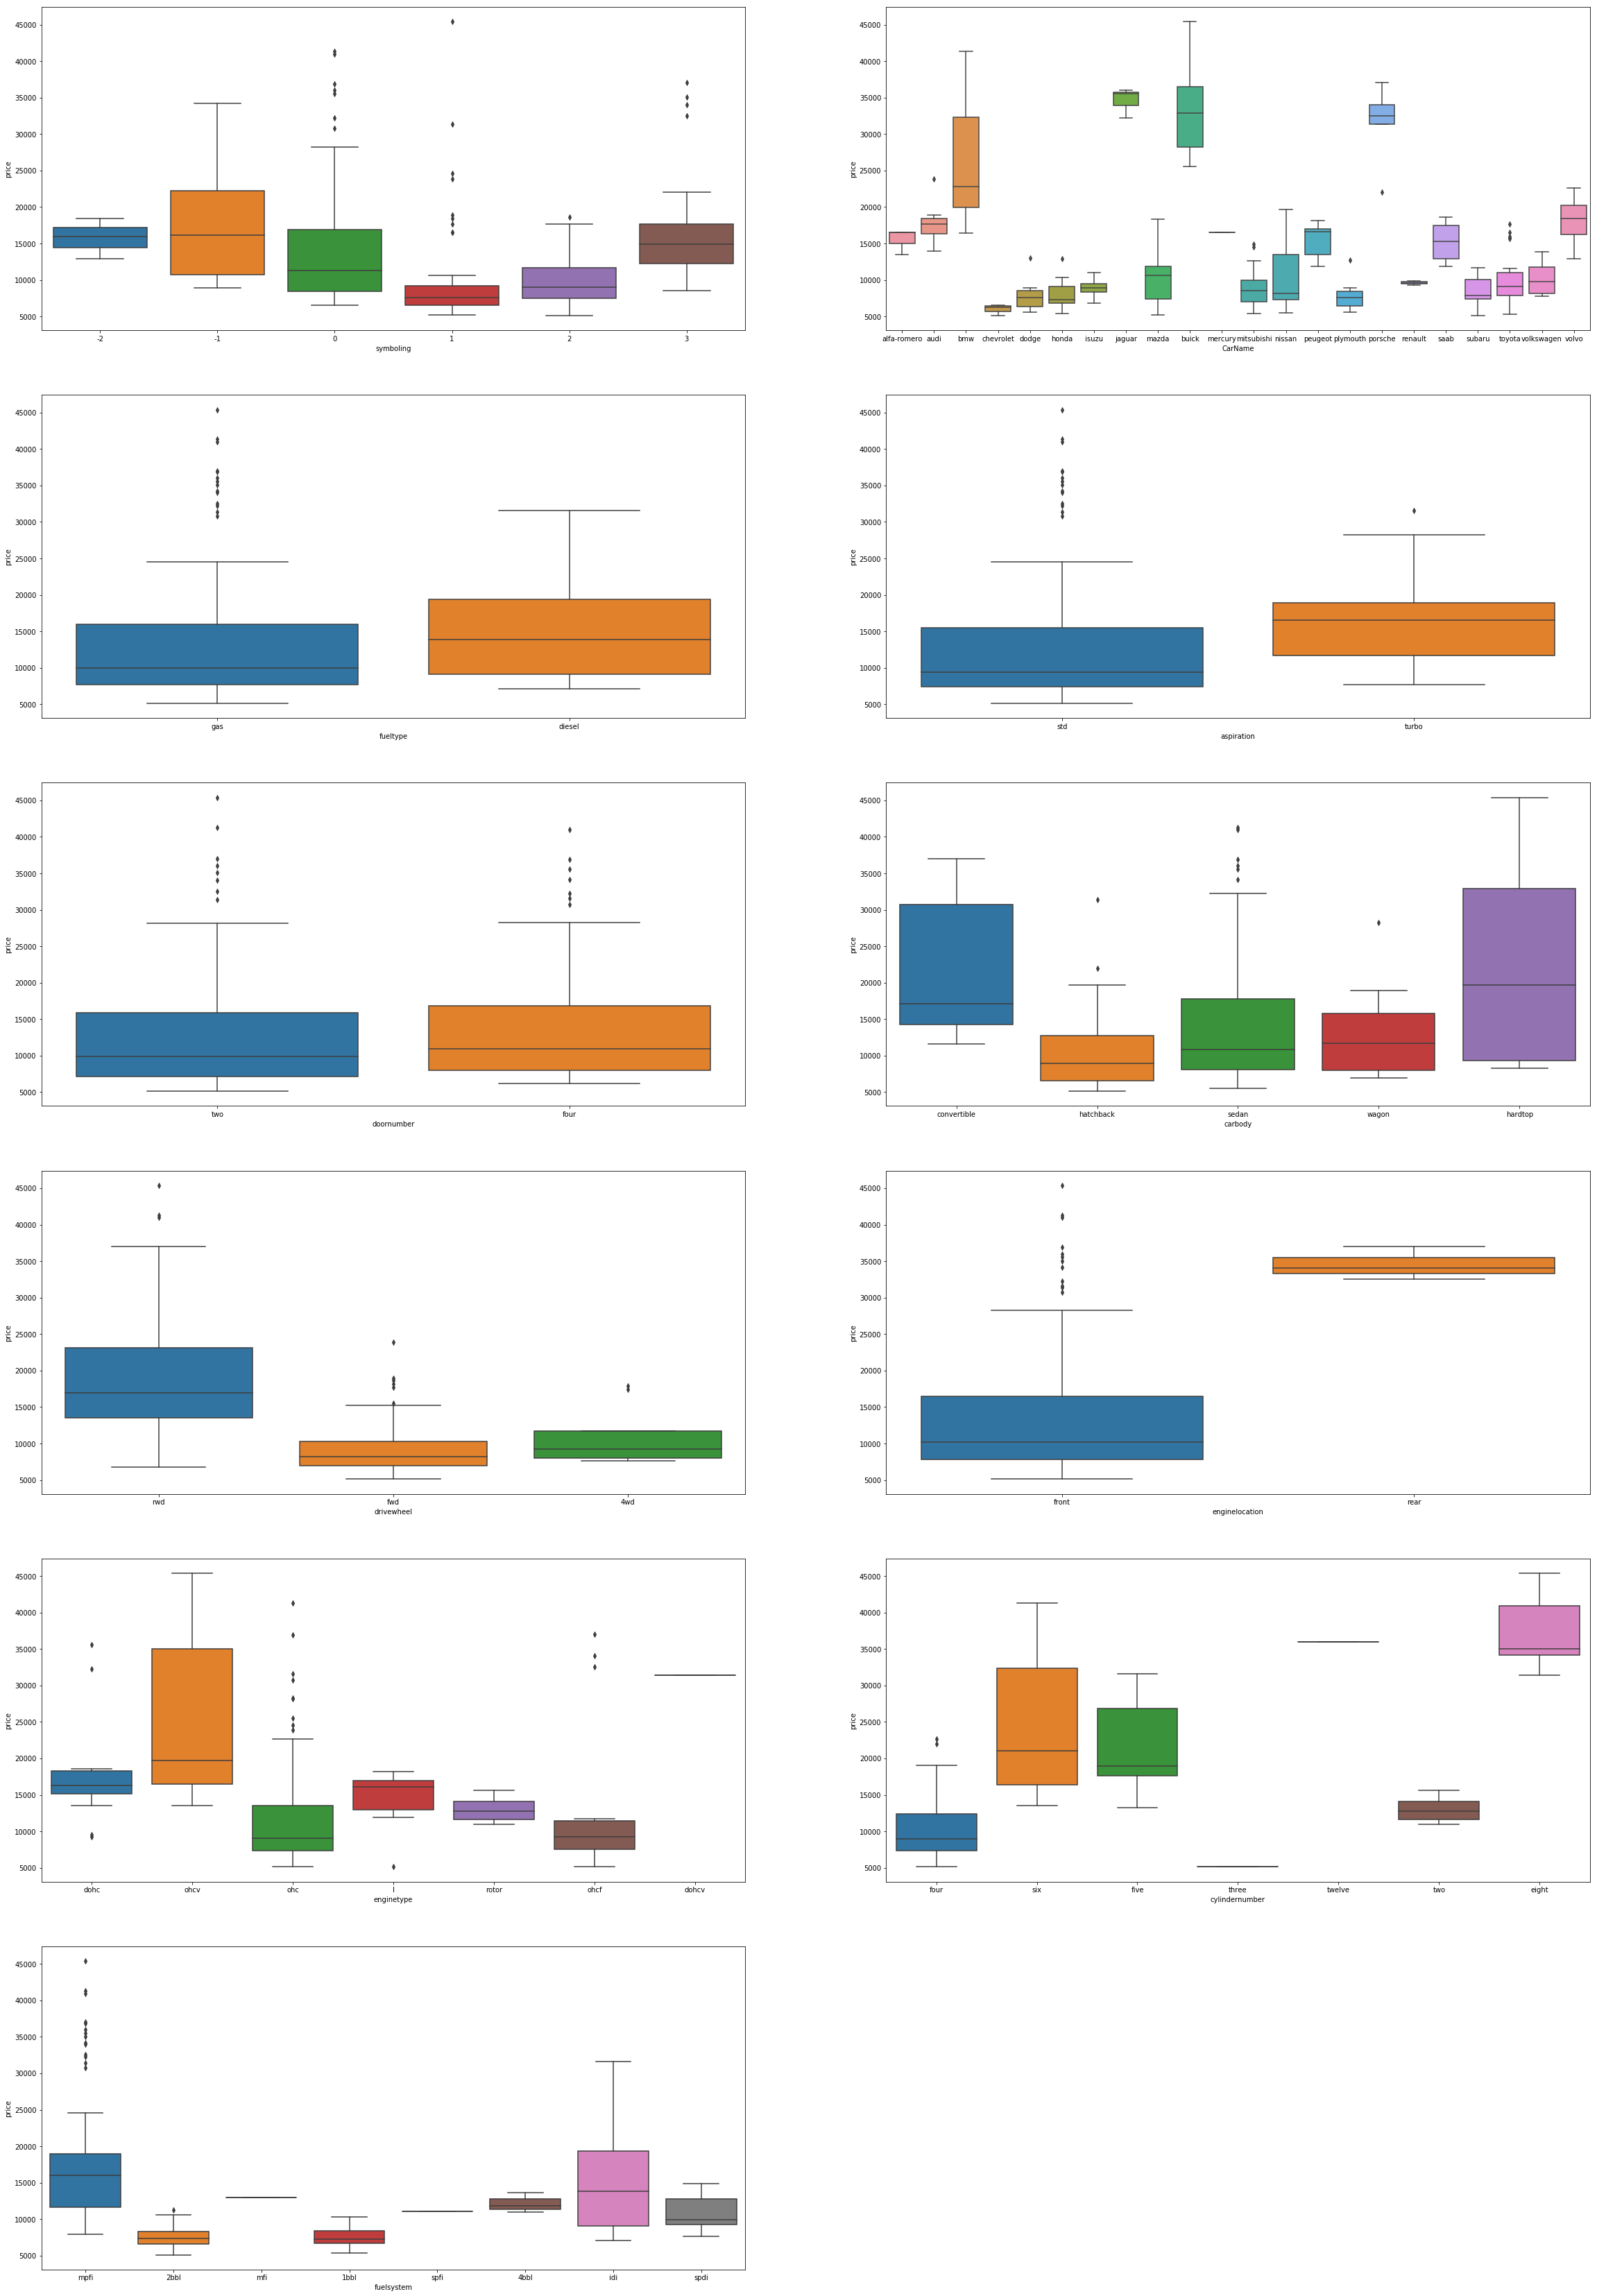

In [393]:
plt.figure(figsize=(40, 60))
plt.subplot(6,2,1)
sns.boxplot(x = 'symboling', y = 'price', data = car_price)
plt.subplot(6,2,2)
sns.boxplot(x = 'CarName', y = 'price', data = car_price)
plt.subplot(6,2,3)
sns.boxplot(x = 'fueltype', y = 'price', data = car_price)
plt.subplot(6,2,4)
sns.boxplot(x = 'aspiration', y = 'price', data = car_price)
plt.subplot(6,2,5)
sns.boxplot(x = 'doornumber', y = 'price', data = car_price)
plt.subplot(6,2,6)
sns.boxplot(x = 'carbody', y = 'price', data = car_price)
plt.subplot(6,2,7)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_price)
plt.subplot(6,2,8)
sns.boxplot(x = 'enginelocation', y = 'price', data = car_price)
plt.subplot(6,2,9)
sns.boxplot(x = 'enginetype', y = 'price', data = car_price)
plt.subplot(6,2,10)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car_price)
plt.subplot(6,2,11)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_price)
plt.show()

## Step 3: Data Preparation

### Dummy Variables

There are lot of categorical variables in the dataset. We need to convert these into integers as well. 

- For `Nominal` variables we will use `Dummy variables`
- For `Ordinal` variables we will use `Labal encoder`

A. Using `Dummy variables` for `Nominal categorical` variables

In [394]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
# Let's drop the first column from status df using 'drop_first = True'
car_name = pd.get_dummies(car_price['CarName'], drop_first = True)
car_price = pd.concat([car_price, car_name], axis = 1)

fuel_type = pd.get_dummies(car_price['fueltype'], drop_first = True)
car_price = pd.concat([car_price, fuel_type], axis = 1)

car_aspiration = pd.get_dummies(car_price['aspiration'], drop_first = True)
car_price = pd.concat([car_price, car_aspiration], axis = 1)

car_body = pd.get_dummies(car_price['carbody'], drop_first = True)
car_price = pd.concat([car_price, car_body], axis = 1)

drive_wheel = pd.get_dummies(car_price['drivewheel'], drop_first = True)
car_price = pd.concat([car_price, drive_wheel], axis = 1)

engine_location = pd.get_dummies(car_price['enginelocation'], drop_first = True)
car_price = pd.concat([car_price, engine_location], axis = 1)

engine_type = pd.get_dummies(car_price['enginetype'], drop_first = True)
car_price = pd.concat([car_price, engine_type], axis = 1)

fuel_system = pd.get_dummies(car_price['fuelsystem'], drop_first = True)
car_price = pd.concat([car_price, fuel_system], axis = 1)

In [395]:
# Now let's see the head of our dataframe.
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,0,1,0,0,0,0,0,1,0,0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,0,0,0,0,0,0,0,1,0,0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,0,0,0,0,0,0,0,1,0,0


B. Encoding `Ordinal categorical` variables using `sklearn Label Encoder`

In [396]:
from sklearn.preprocessing import LabelEncoder

var_list = ['doornumber','cylindernumber']
le = LabelEncoder() #use this encoder to encode values
car_price[var_list] = car_price[var_list].apply(lambda x:le.fit_transform(list(x)))

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

Creating a dataframe to perform Linear regression modelling 
& 
Dropping categorical columnms that have been converted to integers and those which are not useful for the modelling `car_ID,'CarName','fueltype','aspiration','carbody','drivewheel','fueltype','enginelocation','enginetype','fuelsystem'`

In [399]:
car_price_model = car_price
car_price_model = car_price_model.drop(['car_ID','CarName','fueltype','aspiration','carbody','drivewheel','fueltype','enginelocation','enginetype','fuelsystem'], axis=1)
car_price_model.shape

(205, 60)

In [400]:
car_price_model.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,1,88.6,168.8,64.1,48.8,2548,2,130,3.47,...,0,0,0,0,0,0,0,1,0,0
1,3,1,88.6,168.8,64.1,48.8,2548,2,130,3.47,...,0,0,0,0,0,0,0,1,0,0
2,1,1,94.5,171.2,65.5,52.4,2823,3,152,2.68,...,0,1,0,0,0,0,0,1,0,0
3,2,0,99.8,176.6,66.2,54.3,2337,2,109,3.19,...,0,0,0,0,0,0,0,1,0,0
4,2,0,99.4,176.6,66.4,54.3,2824,1,136,3.19,...,0,0,0,0,0,0,0,1,0,0


#### Splitting the model dataset into Test and Training datasets

In [401]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(car_price_model, train_size = 0.7, test_size = 0.3, random_state = 100)

## Step 5: Rescaling the Features 

It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

We will use MinMax scaling.

In [402]:
from sklearn.preprocessing import MinMaxScaler

In [403]:
scaler = MinMaxScaler()

In [404]:
# Apply scaler() to all the columns except the 'dummy' and Label encoded variables
num_vars = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke',
           'compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [405]:
df_train.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
122,1,0,0.244828,0.426016,0.291667,0.265487,0.272692,2,0.139623,0.230159,...,0,0,0,1,0,0,0,0,0,0
125,3,1,0.272414,0.452033,0.666667,0.212389,0.500388,2,0.339623,1.000000,...,0,0,0,0,0,0,0,1,0,0
166,1,1,0.272414,0.448780,0.308333,0.424779,0.314973,2,0.139623,0.444444,...,0,0,0,0,0,0,0,1,0,0
1,3,1,0.068966,0.450407,0.316667,0.088496,0.411171,2,0.260377,0.626984,...,0,0,0,0,0,0,0,1,0,0
199,-1,0,0.610345,0.775610,0.575000,0.858407,0.647401,2,0.260377,0.746032,...,0,0,0,0,0,0,0,1,0,0


In [406]:
df_train.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,0.797203,0.440559,0.411141,0.525476,0.461655,0.509004,0.407878,2.174825,0.241351,0.497946,...,0.083916,0.062937,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,1.195999,0.498199,0.205581,0.204848,0.184517,0.215378,0.211269,0.890598,0.154619,0.207140,...,0.278236,0.243703,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.272414,0.399187,0.304167,0.353982,0.245539,2.000000,0.135849,0.305556,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,1.000000,0.000000,0.341379,0.502439,0.425000,0.522124,0.355702,2.000000,0.184906,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,1.000000,1.000000,0.503448,0.669919,0.550000,0.668142,0.559542,2.000000,0.301887,0.682540,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


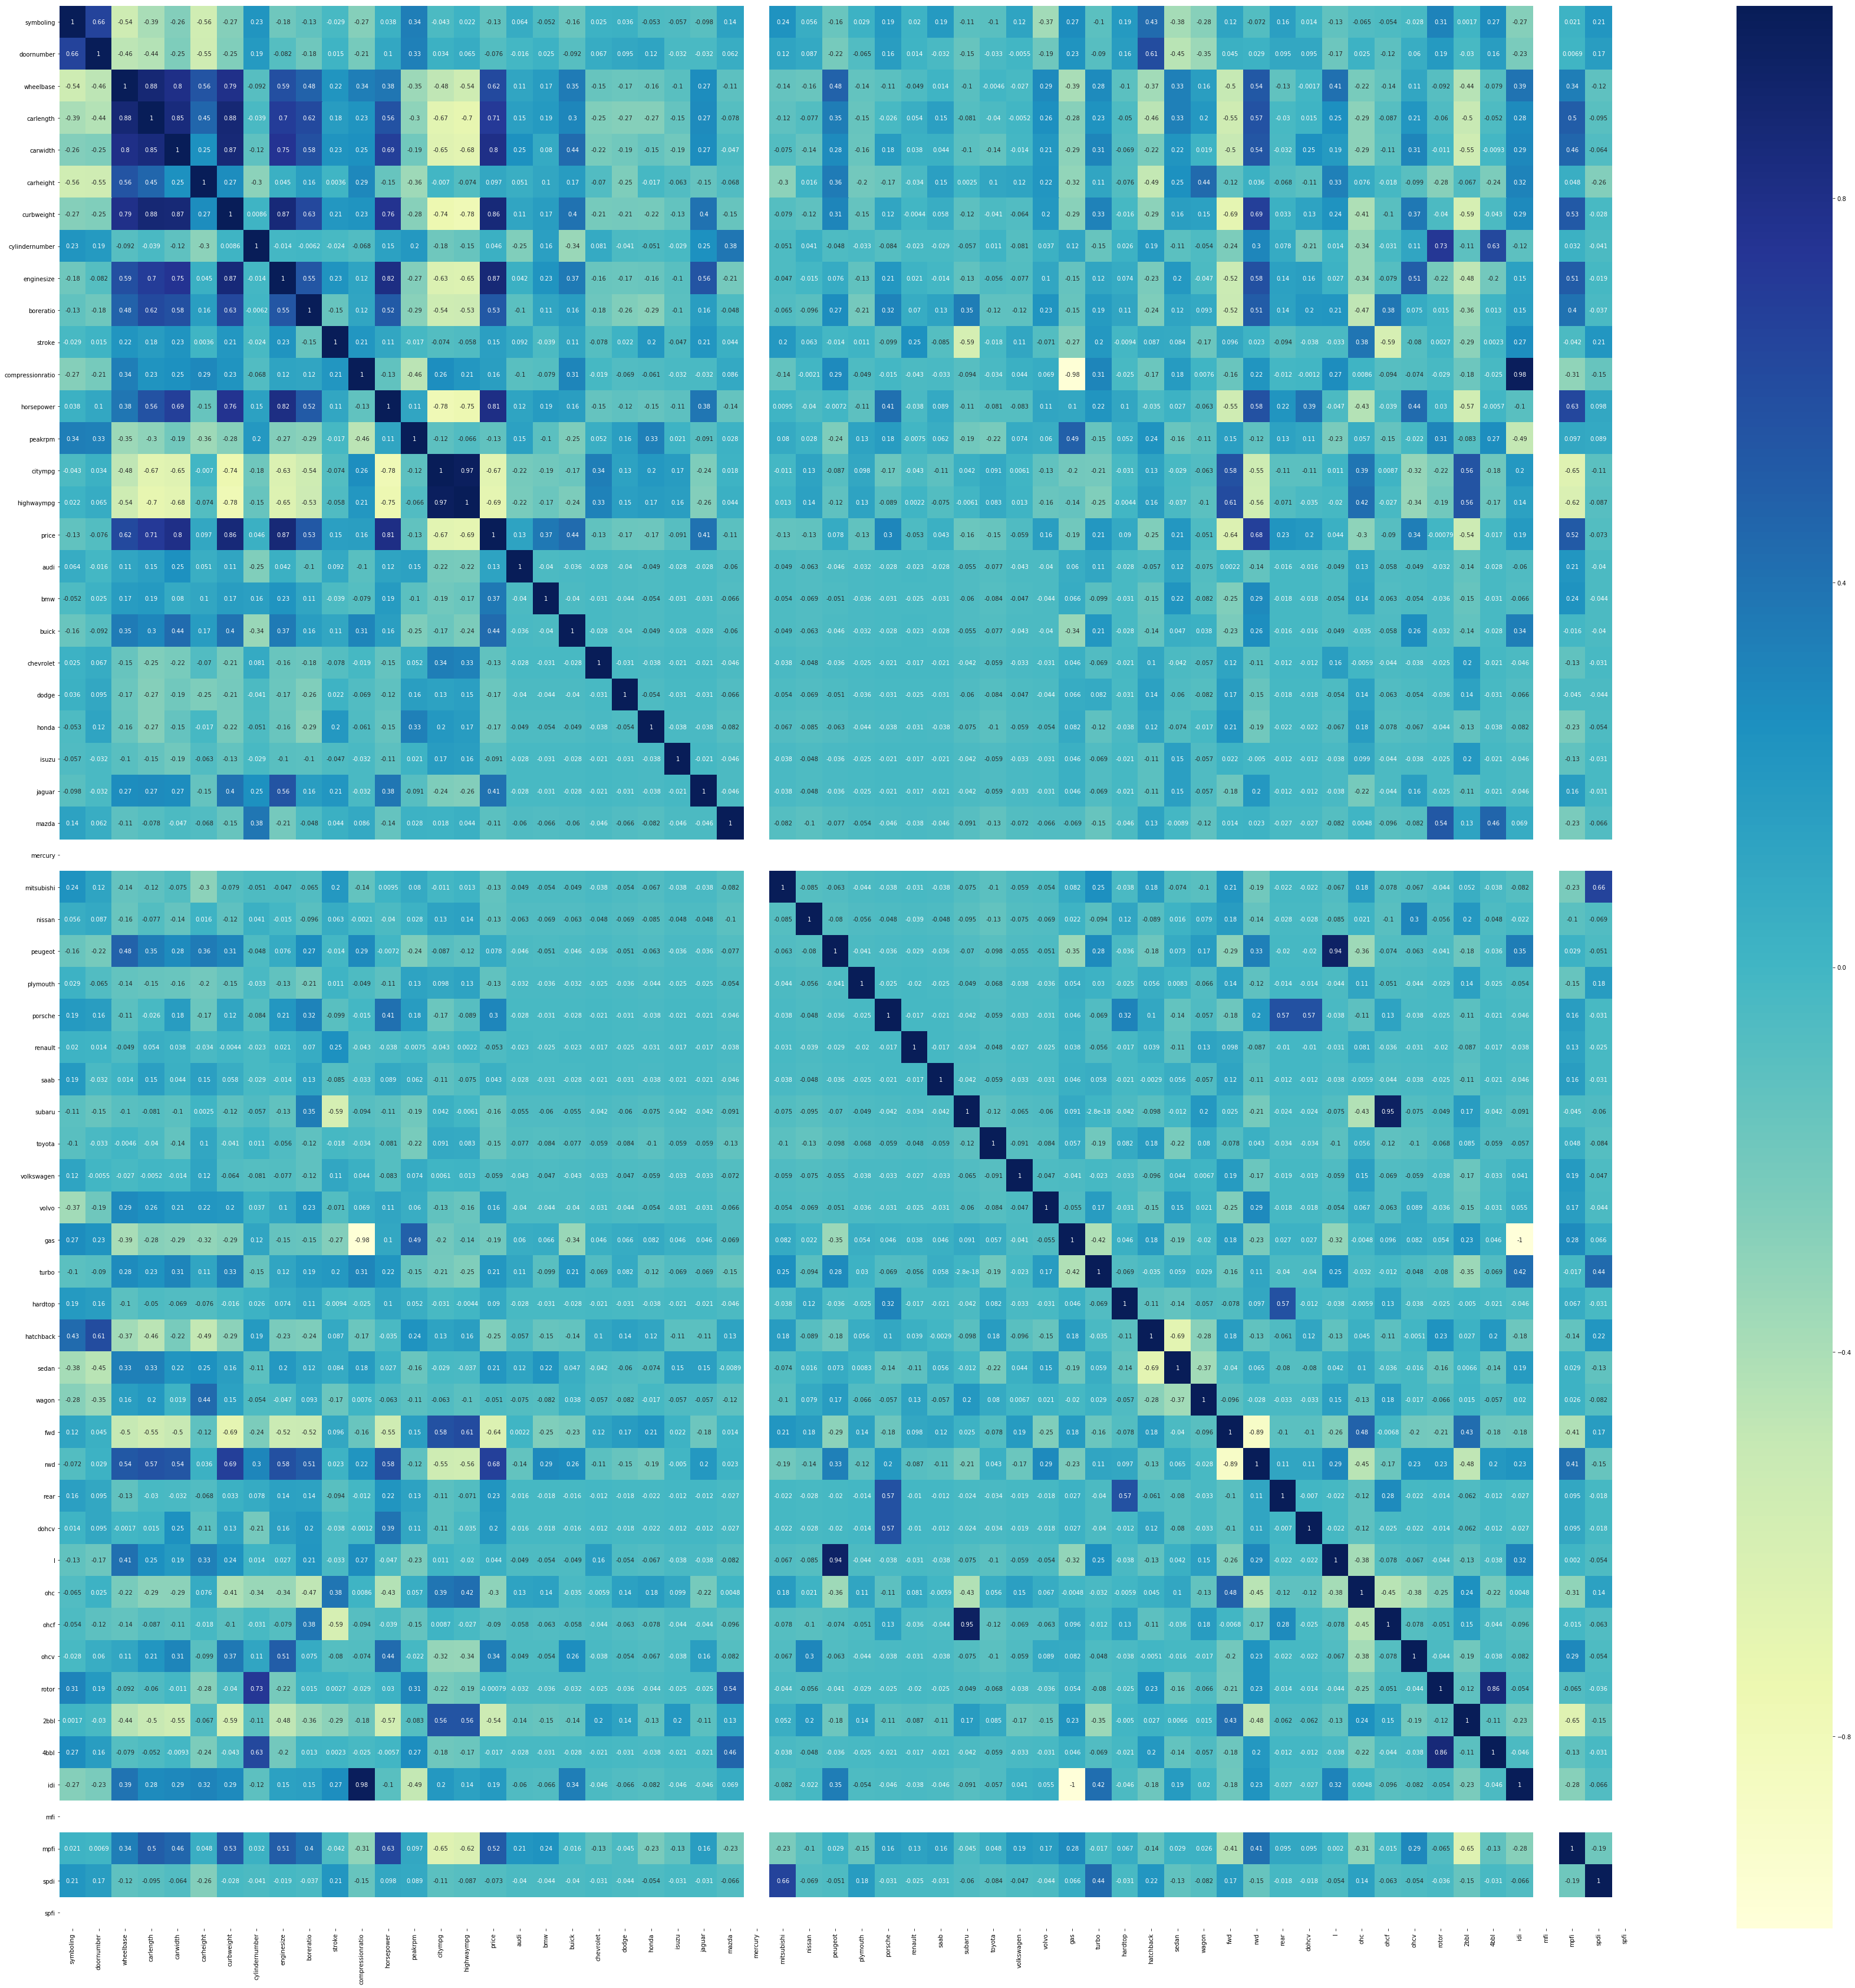

In [407]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (60, 60))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As we can see there is some multicollinearity in the dataset and Price has signinficant correlation (>0.5) with `wheelbase, carlenght, carwidth, curbweight` etc.

## Step 6: Dividing into X and Y sets for the model building

In [408]:
y_train = df_train.pop('price')
X_train = df_train

In [409]:
X_train.shape

(143, 59)

## Step 7: Building Linear regression model using RFE
As the training dataset has **59 variables** therefore it is not feasible to do manual feature selection using additive or removal feature selection approaches. Thus we will use Recursive feature elimination to select the 10 most relevant variables for the model and then go for manual i.e., feature removal based on p-values & VIF

In [410]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [411]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [412]:
# Identifying the top 10 most variables for Linear regression modelling
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 47),
 ('doornumber', False, 45),
 ('wheelbase', False, 28),
 ('carlength', False, 27),
 ('carwidth', True, 1),
 ('carheight', False, 21),
 ('curbweight', True, 1),
 ('cylindernumber', False, 41),
 ('enginesize', True, 1),
 ('boreratio', False, 8),
 ('stroke', False, 38),
 ('compressionratio', False, 2),
 ('horsepower', False, 20),
 ('peakrpm', False, 4),
 ('citympg', False, 3),
 ('highwaympg', False, 31),
 ('audi', False, 15),
 ('bmw', True, 1),
 ('buick', False, 40),
 ('chevrolet', False, 17),
 ('dodge', False, 13),
 ('honda', False, 9),
 ('isuzu', False, 23),
 ('jaguar', False, 36),
 ('mazda', False, 16),
 ('mercury', False, 48),
 ('mitsubishi', False, 7),
 ('nissan', False, 11),
 ('peugeot', True, 1),
 ('plymouth', False, 12),
 ('porsche', True, 1),
 ('renault', False, 5),
 ('saab', False, 26),
 ('subaru', False, 18),
 ('toyota', False, 10),
 ('volkswagen', False, 14),
 ('volvo', False, 39),
 ('gas', False, 6),
 ('turbo', False, 25),
 ('hardtop', False, 30),
 (

In [413]:
# Selecting the columns identified as important for Linear regression by RFE
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'bmw', 'peugeot', 'porsche',
       'rear', 'l', 'rotor', 'idi'],
      dtype='object')

In [415]:
# Columns not significant for Linear regression modelling as identified by RFE
X_train.columns[~rfe.support_]

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carheight',
       'cylindernumber', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'audi', 'buick',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'plymouth', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo', 'gas', 'turbo', 'hardtop', 'hatchback',
       'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'ohc', 'ohcf', 'ohcv', '2bbl',
       '4bbl', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

## Step 8: Building model using statsmodel, for the detailed statistics

In [416]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [417]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [418]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [419]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     145.3
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           3.69e-66
Time:                        15:42:11   Log-Likelihood:                 194.67
No. Observations:                 143   AIC:                            -367.3
Df Residuals:                     132   BIC:                            -334.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1949      0.016    -11.937      0.0

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [420]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [421]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,peugeot,9.78
2,curbweight,9.55
0,const,9.15
8,l,8.97
3,enginesize,6.45
1,carwidth,4.98
6,porsche,1.68
7,rear,1.67
9,rotor,1.24
10,idi,1.24


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `idi` as it has a very high p-value of `0.198`. Let's go ahead and drop this variable

In [422]:
# Dropping highly correlated variables and insignificant variables
X = X_train_rfe.drop('idi', 1,)

In [423]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [424]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     160.5
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           6.47e-67
Time:                        15:43:00   Log-Likelihood:                 193.77
No. Observations:                 143   AIC:                            -367.5
Df Residuals:                     133   BIC:                            -337.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1979      0.016    -12.212      0.0

In [425]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,peugeot,9.76
2,curbweight,9.42
0,const,8.97
8,l,8.96
3,enginesize,6.34
1,carwidth,4.92
6,porsche,1.67
7,rear,1.66
9,rotor,1.23
4,bmw,1.09


### Dropping the Variable and Updating the Model

As you can notice though all variables have permissible p-values (<0.05), there are some variables that have high VIF values. Such variables need to be dropped.

As you might have noticed, the variable `peugeot` has the highest VIF (`9.76`). Hence, this variable isn't of much use and should be dropped.

In [426]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('peugeot', 1)

In [427]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [428]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     158.9
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           1.70e-64
Time:                        15:43:54   Log-Likelihood:                 184.97
No. Observations:                 143   AIC:                            -351.9
Df Residuals:                     134   BIC:                            -325.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1777      0.016    -10.846      0.0

In [429]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,9.24
0,const,8.17
3,enginesize,6.09
1,carwidth,4.79
5,porsche,1.67
6,rear,1.65
7,l,1.28
8,rotor,1.22
4,bmw,1.09


### Dropping the variable and updating the model

As you can notice though all variables have permissible p-values (<0.05), there are some variables that have high VIF values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `curbweight` has the highest VIF (`9.24`). Hence, this variable isn't of much use and should be dropped.

In [430]:
X = X.drop('curbweight', 1)

In [431]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [432]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     162.3
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           1.69e-62
Time:                        15:44:25   Log-Likelihood:                 177.27
No. Observations:                 143   AIC:                            -338.5
Df Residuals:                     135   BIC:                            -314.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1836      0.017    -10.699      0.0

In [433]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.10
2,enginesize,3.15
1,carwidth,3.03
5,rear,1.65
4,porsche,1.60
7,rotor,1.14
6,l,1.10
3,bmw,1.09


### Dropping the variable and updating the model

As you might have noticed, dropping `curbweight` decreased the VIF of all the variables except `constant` under 5. But from the summary, we can still see some of them have a high p-value. `l` for instance, has a p-value of 0.452. We should drop this variable as well.

In [434]:
X = X.drop('l', 1)

In [435]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [436]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     189.8
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           1.55e-63
Time:                        15:45:20   Log-Likelihood:                 176.97
No. Observations:                 143   AIC:                            -339.9
Df Residuals:                     136   BIC:                            -319.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1818      0.017    -10.713      0.0

In [437]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,7.95
2,enginesize,3.02
1,carwidth,2.77
5,rear,1.64
4,porsche,1.59
6,rotor,1.13
3,bmw,1.09


### Dropping the variable and updating the model

As you might have noticed, even after dropping `l` VIF of all the variables except `constant` remains under 5. But from the summary, we can still see some of them have a high p-value. `porsche` for instance, has a p-value of 0.100. We should drop this variable as well.

In [438]:
X = X.drop('porsche', 1)

In [439]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [440]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     224.4
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           3.81e-64
Time:                        15:45:38   Log-Likelihood:                 175.54
No. Observations:                 143   AIC:                            -339.1
Df Residuals:                     137   BIC:                            -321.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1870      0.017    -11.143      0.0

In [441]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,7.67
2,enginesize,3.01
1,carwidth,2.68
5,rotor,1.12
3,bmw,1.09
4,rear,1.08


### Dropping the variable and updating the model

As you might have noticed, even after dropping `porsche` VIF of all the variables except constant remains under 5. We should drop `const` from the model.

In [442]:
X = X.drop('const', 1)

In [443]:
# Build a fourth fitted model
X_train_lm = X

lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [444]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     244.0
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           1.15e-66
Time:                        15:45:53   Log-Likelihood:                 129.41
No. Observations:                 143   AIC:                            -248.8
Df Residuals:                     138   BIC:                            -234.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carwidth       0.0327      0.052      0.629      0.5

In [445]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,9.98
0,carwidth,9.63
4,rotor,1.16
2,bmw,1.13
3,rear,1.08


### Dropping the variable and updating the model

As you might have noticed, even after dropping `constant` p-value of `carwidth` has become very high `0.530`. Therefore we need to drop `carwidth` from the model.

In [446]:
X = X.drop('carwidth', 1)

In [447]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

In [448]:
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     172.3
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           1.27e-52
Time:                        15:46:29   Log-Likelihood:                 144.99
No. Observations:                 143   AIC:                            -280.0
Df Residuals:                     138   BIC:                            -265.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0848      0.015     -5.838      0.0

In [449]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,1.12
1,bmw,1.10
2,rear,1.02
3,rotor,1.00


#### Conclusion:
Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.
Therefore the predictors of Car prices is `enginesize, bmw, rear, rotor`, i.e.,
- enginesize: Size of car
- bmw: Whether the car is a manufactured by BMW company or not
- rear: Engine is located at the rear or front
- rotor: Engine type is rotor or not

## Step 9: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [450]:
y_train_price = lr_7.predict(X_train_lm)

Text(0.5, 0, 'Errors')

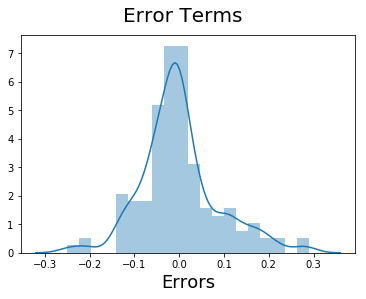

In [451]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Conclusion:
Error terms look to be normally distributed with mean as `0`

## Step 10: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. seventh model.

#### Applying the scaling on the test sets

In [452]:
# Apply scaler() to all the columns except the dummy' and Label encoded variables
num_vars = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke',
           'compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [453]:
df_test.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.919355,0.435484,0.437764,0.559481,0.480376,0.559663,0.428470,1.983871,0.265673,0.556580,...,0.048387,0.064516,0.0,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129
std,1.358620,0.499868,0.212861,0.189947,0.165440,0.215811,0.179488,0.495618,0.162820,0.228484,...,0.216335,0.247676,0.0,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000
min,-2.000000,0.000000,0.000000,0.056911,0.183333,0.141593,0.128394,0.000000,0.067925,-0.111111,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.313793,0.459350,0.358333,0.384956,0.305275,2.000000,0.177358,0.404762,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.387931,0.547967,0.441667,0.588496,0.406129,2.000000,0.226415,0.563492,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000
75%,2.000000,1.000000,0.570690,0.719919,0.516667,0.699115,0.564876,2.000000,0.316038,0.746032,...,0.000000,0.000000,0.0,0.750000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
max,3.000000,1.000000,1.182759,1.089431,0.975000,1.061947,0.935609,3.000000,0.932075,0.888889,...,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [454]:
y_test = df_test.pop('price')
X_test = df_test

In [455]:
# Adding constant variable to test dataframe
X_test_m4 = X_test[['enginesize','rotor','bmw','rear']]
X_test_m4 = sm.add_constant(X_test_m4)

In [456]:
X_test_m4.head()

,const,enginesize,rotor,bmw,rear
160,1.0,0.139623,0,0,0
186,1.0,0.181132,0,0,0
59,1.0,0.230189,0,0,0
165,1.0,0.139623,0,0,0
140,1.0,0.177358,0,0,0


In [457]:
# Making predictions using the fourth model

y_pred = lr_7.predict(X_test_m4)

## Step 11: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

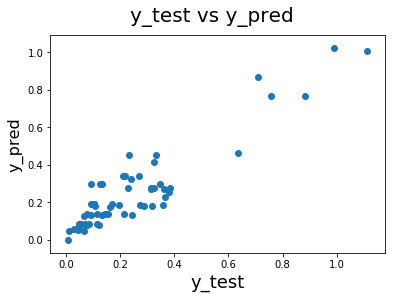

In [458]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [459]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8449889877486765

### CONCLUSION: 
The r-square of the test model (0.845) is more or less similar to the train model r-square (0.833), therefore we can finalise this model

We can see that the equation of our best fitted line is:

$ price = 1.188  \times  enginesize + 0.1988  \times  bmw + 0.2872 \times rear  + 0.2516 \times rotor  - 0.0848 $

### Thank You !!